In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Before Normalization

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)



Accuracy =  94.83568075117371 %
Precision =  0.9130480445771597
Recall =  0.9212040704497602
F1-score =  0.9166163584874228


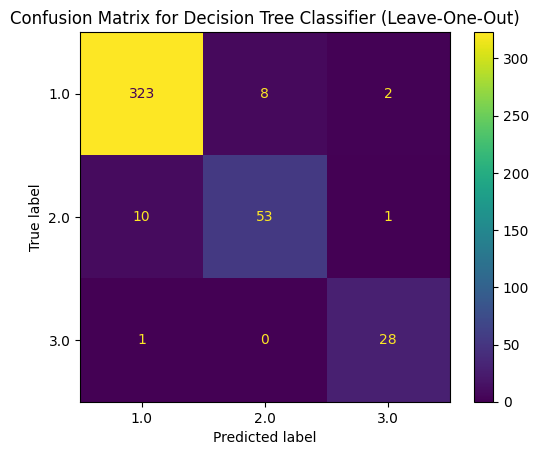

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       333
         2.0       0.87      0.83      0.85        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.95       426
   macro avg       0.91      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


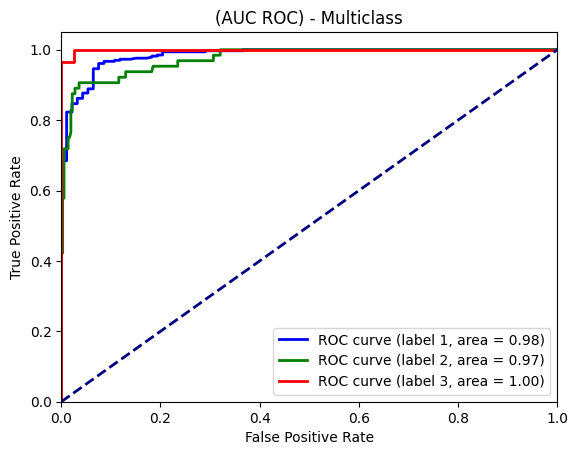

In [7]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = gradient_boosting.predict_proba(X_test)
plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


In [8]:
# train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# plt.figure()
# plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
# plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.title("Learning Curve")
# plt.legend(loc="best")
# plt.show()

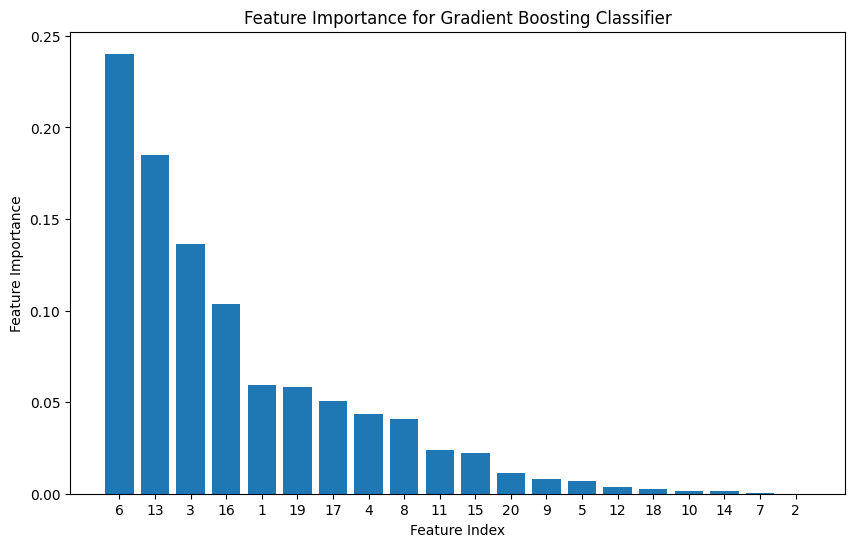

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
gb_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = gb_classifier.feature_importances_

# Sorting features based on their importance
sorted_features_indices = feature_importances.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


## After Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [12]:
gradient_boosting_after = GradientBoostingClassifier()
gradient_boosting_after.fit(X_train, y_train)
y_pred_after = gradient_boosting_after.predict(X_test)



Accuracy =  93.0 %
Precision =  0.9299999999999999
Recall =  0.9306891025641025
F1-score =  0.9299719887955181


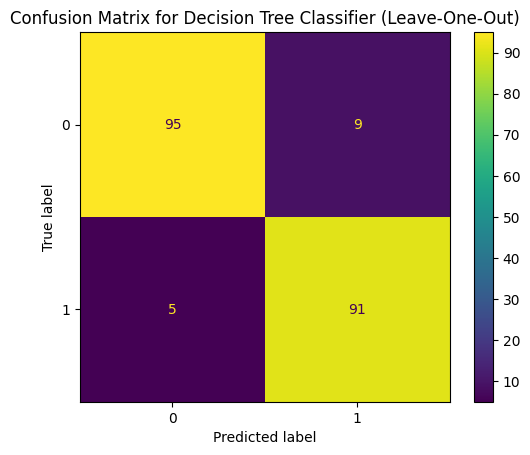

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       104
           1       0.91      0.95      0.93        96

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred_after) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred_after,average='macro'))
print("Recall = ", recall_score(y_test, y_pred_after,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred_after,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_after), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_after))


In [14]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = gradient_boosting.predict_proba(X_test)
plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 20 features, but GradientBoostingClassifier is expecting 21 features as input.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting_after, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generating some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
gb_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = gb_classifier.feature_importances_

# Sorting features based on their importance
sorted_features_indices = feature_importances.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()
